In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os 
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model


C:\Users\Anonymous\AppData\Local\Temp\ipykernel_20508\3144497745.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
img_arr=[]
for i in range(1,151):
    img_path=os.path.join('E:\python\python_projects\deepfaceTensorflow\DeepLearning\CNN\datasets\cifar10\\'+str(i)+'.png')
    img=np.array(Image.open(img_path))/255.
    img_arr.append(img)
img_arr=np.array(img_arr)
img_arr.shape

(150, 32, 32, 3)

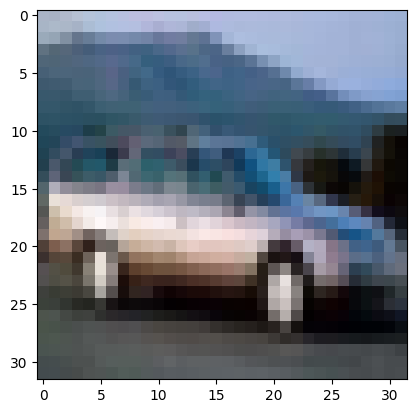

In [9]:
plt.imshow(img_arr[4])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


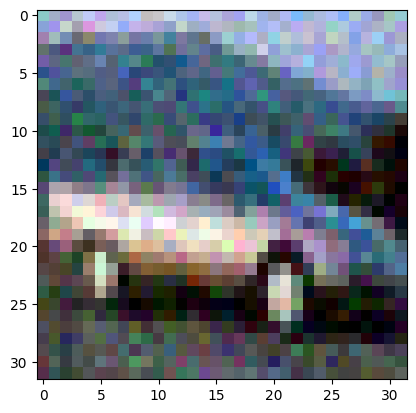

In [16]:
noise_factor=0.07
noisy_arr=img_arr+noise_factor*np.random.normal(size=img.shape)
# print(noisy_arr.shape
plt.imshow(noisy_arr[4])
plt.show()

In [23]:
def auto_encoders(img):
    fsize=3
    psize=1
    #encoding
    conv1=Conv2D(32,(fsize,fsize), activation='relu',padding='same')(img)
    pool1=MaxPooling2D(pool_size=(psize,psize))(conv1)
    conv2=Conv2D(64,(fsize,fsize), activation='relu',padding='same')(pool1)
    pool2=MaxPooling2D(pool_size=(psize,psize))(conv2)
    conv3=Conv2D(128,(fsize,fsize), activation='relu',padding='same')(pool2)

    
    conv4=Conv2D(128,(fsize,fsize), activation='relu',padding='same')(conv3)
    up4=UpSampling2D((psize,psize))(conv4)
    conv5=Conv2D(64,(fsize,fsize), activation='relu',padding='same')(up4)
    up5=UpSampling2D((psize,psize))(conv5)
    decode=Conv2D(3,(fsize,fsize), activation='sigmoid',padding='same')(up5)
    return decode

img=Input(shape=(32,32,3))
model=Model(img, auto_encoders(img))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(noisy_arr[:120],img_arr[:120], epochs=10,validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 1s 112ms/step - loss: 0.0588 - val_loss: 0.0629
Epoch 2/10
3/3 [==============================] - 0s 24ms/step - loss: 0.0522 - val_loss: 0.0483
Epoch 3/10
3/3 [==============================] - 0s 23ms/step - loss: 0.0385 - val_loss: 0.0330
Epoch 4/10
3/3 [==============================] - 0s 23ms/step - loss: 0.0294 - val_loss: 0.0340
Epoch 5/10
3/3 [==============================] - 0s 23ms/step - loss: 0.0271 - val_loss: 0.0315
Epoch 6/10
3/3 [==============================] - 0s 23ms/step - loss: 0.0197 - val_loss: 0.0231
Epoch 7/10
3/3 [==============================] - 0s 22ms/step - loss: 0.0176 - val_loss: 0.0247
Epoch 8/10
3/3 [==============================] - 0s 22ms/step - loss: 0.0161 - val_loss: 0.0174
Epoch 9/10
3/3 [==============================] - 0s 22ms/step - loss: 0.0158 - val_loss: 0.0149
Epoch 10/10
3/3 [==============================] - 0s 21ms/step - loss: 0.0131 - val_loss: 0.0122


5/5 [==============================] - 0s 58ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


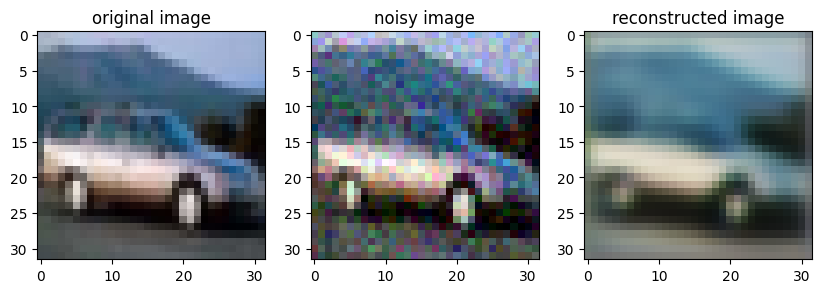

In [26]:
pred=model.predict(img_arr)
plt.figure(figsize=(10,5))
ax1=plt.subplot2grid((1,3),(0,0))
ax1.set_title('original image')
ax1.imshow(img_arr[4])
ax1=plt.subplot2grid((1,3),(0,1))
ax1.set_title('noisy image')
ax1.imshow(noisy_arr[4])
ax1=plt.subplot2grid((1,3),(0,2))
ax1.set_title('reconstructed image')
ax1.imshow(pred[4])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


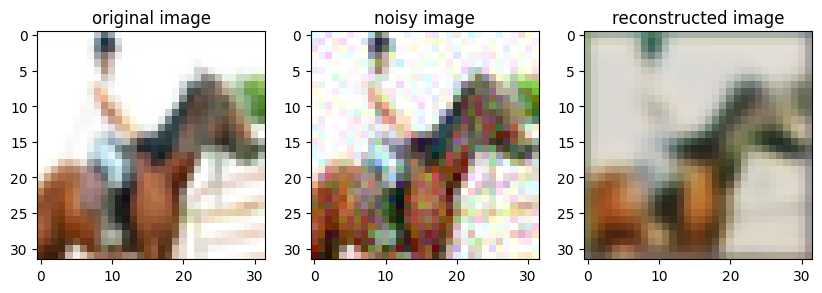

In [27]:

plt.figure(figsize=(10,5))
ax1=plt.subplot2grid((1,3),(0,0))
ax1.set_title('original image')
ax1.imshow(img_arr[131])
ax1=plt.subplot2grid((1,3),(0,1))
ax1.set_title('noisy image')
ax1.imshow(noisy_arr[131])
ax1=plt.subplot2grid((1,3),(0,2))
ax1.set_title('reconstructed image')
ax1.imshow(pred[131])
plt.show()